In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as ds
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm

a) narzędzia statystyczne

In [2]:
breast_cancer_ds = ds.load_breast_cancer()
features_df = pd.DataFrame(breast_cancer_ds.data, columns=breast_cancer_ds.feature_names)
targets_df = pd.DataFrame(breast_cancer_ds.target, columns=['target'])

- SelectKBest razem z chi-kwadrat

> SelectKBest - "Select features according to the k highest scores." -- sklearn's documentation

> Test chi-kwadrat – "każdy test statystyczny, w którym statystyka testowa ma rozkład chi kwadrat, jeśli teoretyczna zależność jest prawdziwa. Test chi-kwadrat służy sprawdzaniu hipotez. Innymi słowy wartość testu oceniana jest za pomocą rozkładu chi kwadrat. Test najczęściej wykorzystywany w praktyce. Można go wykorzystywać do badania zgodności zarówno cech mierzalnych, jak i niemierzalnych." --Wikipedia

In [3]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features_df, targets_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_df.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  
print(featureScores.nlargest(10,'Score'))

            Feature          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508


- Heatmap

In [4]:
df = features_df.join(targets_df)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
corrmat = df.corr()
corrmat['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

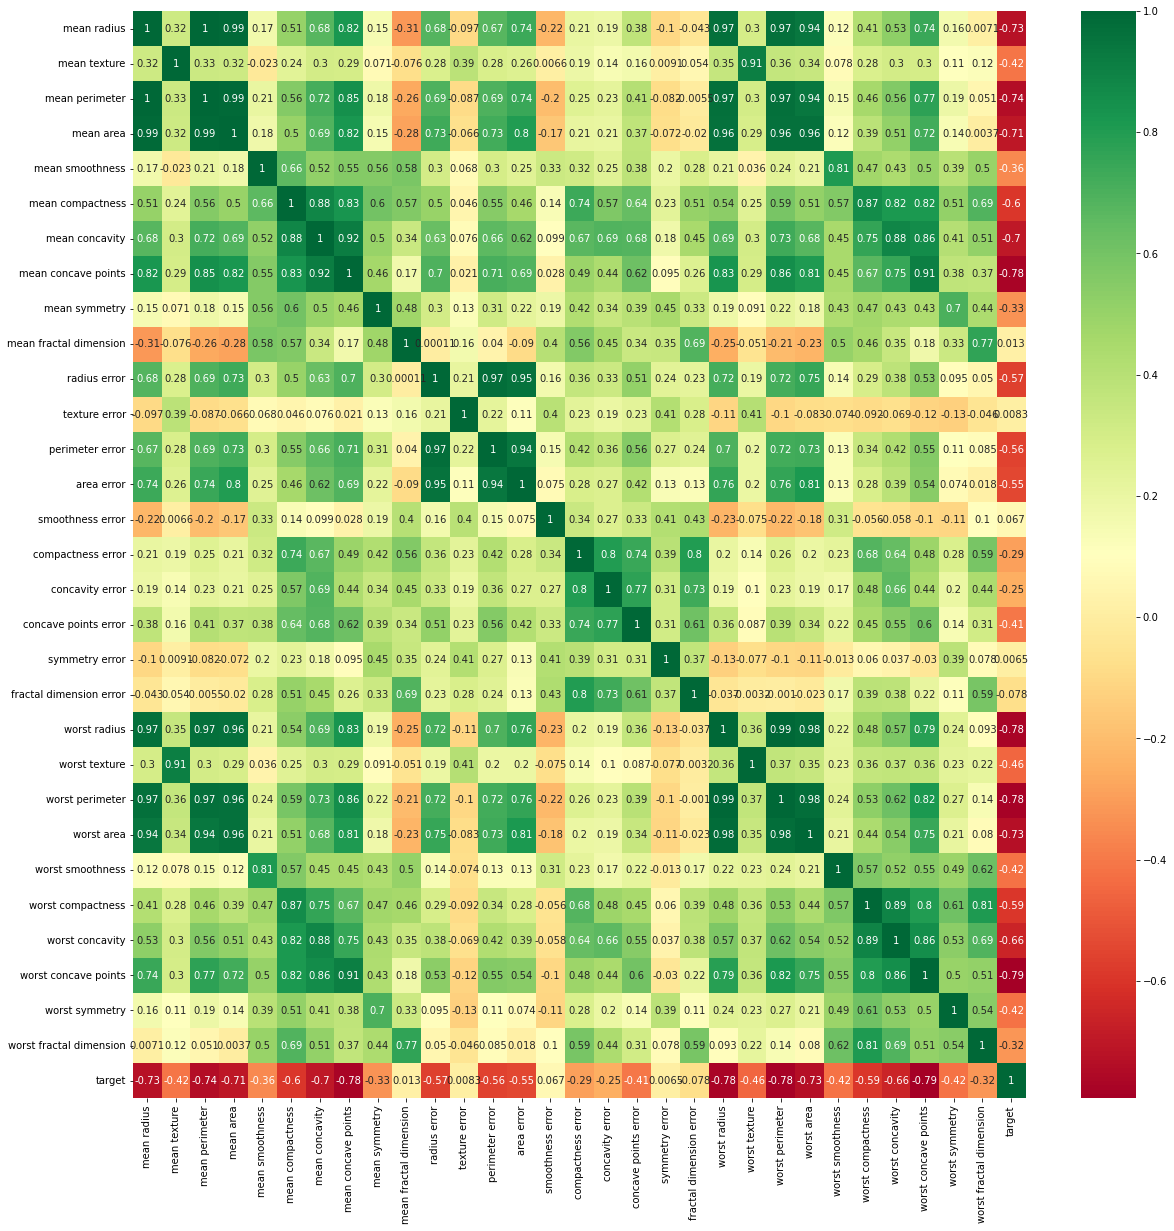

In [6]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

b) redukcja wymiarowości (PCA)

PCA jest zależna od skali więc przed jej użyciem należy przeskalować cechy

In [7]:
features_df_copy = features_df.copy()
features_df_copy = StandardScaler().fit_transform(features_df_copy)

In [8]:
n_components = 10
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(features_df_copy)
columns = [f'pc{i+1}' for i in range(n_components)]
principalDf = pd.DataFrame(data = principalComponents, columns=columns)
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159371,-0.398407,-0.157118,-0.877387
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711905,1.107029
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024066,0.454264
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429908,1.059571,-1.405444,-1.117092
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636379,-0.263808,0.377655


podczas PCA tracimy pewną część informacji (wariancja)

poniżej można zobaczyć, ile każdy z komponentów zachował wariancji

In [9]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

a tyle sumarycznie

In [10]:
sum(pca.explained_variance_ratio_)

0.9515688141990083

c) selekcja cech: kilka metod

- Extra Tree Classifier

> "This is a Model-based approach for selecting the features using the tree-based supervised models to make decisions on the importance of the features. The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for." -- analyticsvidhya.com

worst concave points       0.096782
worst perimeter            0.095452
mean concave points        0.082784
worst radius               0.078550
mean perimeter             0.067497
worst area                 0.064663
mean radius                0.056379
mean area                  0.054740
mean concavity             0.051620
worst concavity            0.041725
area error                 0.041339
worst texture              0.030115
radius error               0.027767
worst compactness          0.024680
mean compactness           0.022321
mean texture               0.021899
worst smoothness           0.020924
perimeter error            0.018115
worst symmetry             0.015425
mean smoothness            0.012262
worst fractal dimension    0.011264
concave points error       0.010287
concavity error            0.009968
compactness error          0.008153
texture error              0.006540
mean symmetry              0.006527
symmetry error             0.006236
mean fractal dimension     0

C:\Users\mcham\AppData\Local\Temp\ipykernel_21840\3458809097.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features_df, targets_df)


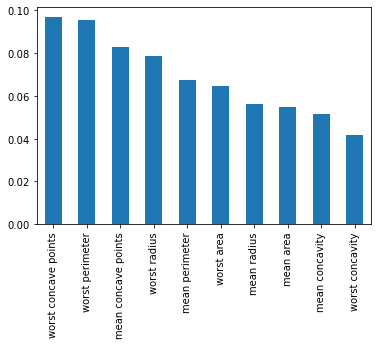

In [11]:
model = ExtraTreesClassifier()
model.fit(features_df, targets_df)
feat_importances = pd.Series(model.feature_importances_, index=features_df.columns)
feat_importances.nlargest(n_components).plot.bar()
print(feat_importances.sort_values(ascending=False))
plt.show()

- Pearson Correlation

> "Współczynnik korelacji liniowej Pearsona – współczynnik określający poziom zależności liniowej między zmiennymi losowymi" --wikipedia

In [12]:
cor_target = abs(corrmat["target"])
relevant_features = cor_target[cor_target>0.2]
relevant_features.sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
Name: target, dtype: float64

- Logit model

> Logit model - "the Logistic regression-based model which selects the features based on the p-value score of the feature. The features with p-value less than 0.05 are considered to be the more relevant feature." --analyticsvidhya.com

> p-value - "prawdopodobieństwo, że zależność jaką zaobserwowano w losowej próbie z populacji mogła wystąpić przypadkowo, wskutek losowej zmienności prób, choć w populacji wcale nie występuje" -- wikipedia

In [13]:
logit_model=sm.Logit(targets_df, features_df)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.086505
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.869      
Dependent Variable:     target             AIC:                158.4424   
Date:                   2022-05-12 15:38   BIC:                288.7588   
No. Observations:       569                Log-Likelihood:     -49.221    
Df Model:               29                 LL-Null:            -375.72    
Df Residuals:           539                LLR p-value:        6.2457e-119
Converged:              0.0000             Scale:              1.0000     
--------------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------
mean radius              3.4910   7.9457  0.4394 0.6604  -12.0824  19.0

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed 